In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.
C:\Users\usaid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\usaid\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [2]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Embedding

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])

history = model.fit(x_train, y_train,b
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.5111 - acc: 0.7544 - val_loss: 0.4590 - val_acc: 0.7874
Epoch 2/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2984 - acc: 0.8816 - val_loss: 0.3035 - val_acc: 0.8740
Epoch 3/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2361 - acc: 0.9097 - val_loss: 0.4232 - val_acc: 0.8574
Epoch 4/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1993 - acc: 0.9256 - val_loss: 0.3304 - val_acc: 0.8560
Epoch 5/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.1777 - acc: 0.9349 - val_loss: 0.3134 - val_acc: 0.8900
Epoch 6/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1563 - acc: 0.9444 - val_loss: 0.3349 - val_acc: 0.8722
Epoch 7/10
20000/20000 [==========

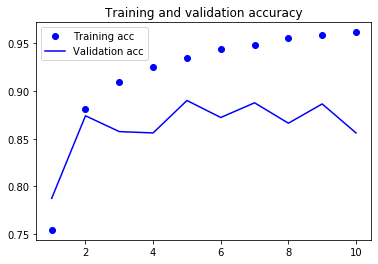

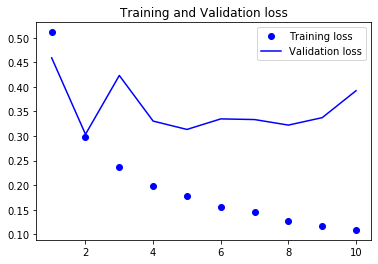

In [3]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()